Data Science - EA10: Clustering

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


In [21]:
country_data = pd.read_csv('data/country.csv')

country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680


In [22]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   child_mort  151 non-null    float64
 2   exports     151 non-null    float64
 3   health      151 non-null    float64
 4   imports     151 non-null    float64
 5   income      151 non-null    int64  
 6   inflation   151 non-null    float64
 7   life_expec  151 non-null    float64
 8   total_fer   151 non-null    float64
 9   gdpp        151 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB


In [23]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


Scaling data

In [24]:
data=country_data.drop(['country'],axis=1)
scaling=StandardScaler()
scaled=scaling.fit_transform(data)

scaled_df=pd.DataFrame(scaled,columns=data.columns)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.290688,0.222499,-0.487182,0.421831,-0.516285,2.865576,-0.509280,-0.195277,-0.587378
1,0.955192,-0.738239,-0.169736,-1.188277,-0.736187,1.073589,-0.498146,1.291005,-0.649931
2,1.294977,-0.627932,-0.072338,-0.466786,-0.854752,0.387880,-1.967811,1.576318,-0.704518
3,-0.822526,1.279311,1.410278,1.155551,1.175543,-0.546514,1.027187,-0.712821,1.644762
4,1.922842,0.023235,0.403831,0.132419,-0.876083,1.183302,-1.477923,2.392446,-0.711201


c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

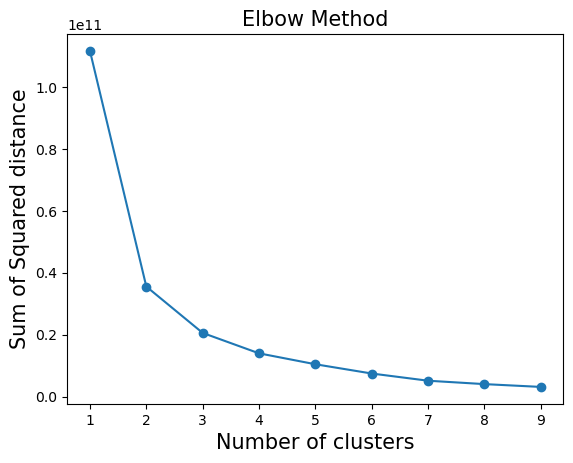

In [27]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

Choosing 3 clusters (because of elbow/ knee)

In [29]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
country_data['cluster'] = kmeans.fit_predict(scaled_df)

country_data

c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,1
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480,2
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459,2
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,2
...,...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,1
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,1
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680,1


In [31]:
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

pca_df['cluster'] = country_data['cluster']

pca_df

,PC1,PC2,cluster
0,-0.963435,0.658502,1
1,-2.319607,-0.659672,2
2,-2.972960,0.259851,2
3,3.044766,0.627254,0
4,-3.177162,1.088177,2
...,...,...,...
146,2.382175,-1.026547,0
147,0.883982,-1.365177,1
148,0.093241,-1.724261,1
149,0.974621,-0.303671,1


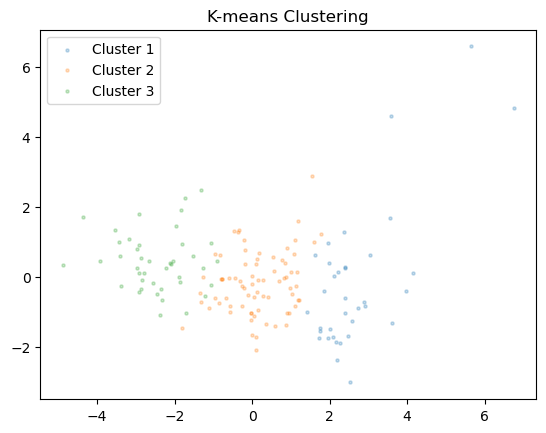

In [32]:
plt.figure()
for cluster in range(n_clusters):
    plt.scatter(pca_df[pca_df['cluster'] == cluster]['PC1'], 
                pca_df[pca_df['cluster'] == cluster]['PC2'], 
                s=5, label=f'Cluster {cluster+1}', alpha=0.25)
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [ ]:
cluster_analysis = airbnb_data.groupby('cluster').agg({
    'price': 'mean',
    'availability 365': 'mean',
}).reset_index()

cluster_analysis

,cluster,price,availability 365
0,0,339.455494,286.441231
1,1,621.617701,52.560143
2,2,237.148111,48.774936
3,3,1010.791159,46.081467
4,4,917.089807,285.833774


In [ ]:
cluster_counts = airbnb_data['cluster'].value_counts().reset_index()
cluster_analysis = cluster_analysis.merge(cluster_counts, on='cluster', suffixes=('_x', '_y'))
cluster_analysis

,cluster,price,availability 365,count
0,0,339.455494,286.441231,18403
1,1,621.617701,52.560143,22782
2,2,237.148111,48.774936,21207
3,3,1010.791159,46.081467,21423
4,4,917.089807,285.833774,18243


In [ ]:
cluster_analysis['profitability'] = cluster_analysis['price'] * (365 - cluster_analysis['availability 365']) / cluster_analysis['count']

best_clusters = cluster_analysis.sort_values(by='profitability', ascending=False)

best_clusters

,cluster,price,availability 365,count,profitability
3,3,1010.791159,46.081467,21423,15.047381
1,1,621.617701,52.560143,22782,8.525070
4,4,917.089807,285.833774,18243,3.979748
2,2,237.148111,48.774936,21207,3.536199
0,0,339.455494,286.441231,18403,1.449068


In [ ]:
most_profitable_clusters = best_clusters[best_clusters['profitability'] > 10]['cluster'].tolist()
airbnb_profitability_data = airbnb_data[airbnb_data['cluster'].isin(most_profitable_clusters)]
airbnb_profitability_data

,neighbourhood group,neighbourhood,lat,long,price,service fee,availability 365,cluster
23,Brooklyn,Park Slope,40.67989,-73.97798,1050.0,210.000000,9.000000,3
25,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,1175.0,235.000000,131.964921,3
33,Brooklyn,Greenpoint,40.72219,-73.93762,858.0,172.000000,105.865914,3
36,Brooklyn,South Slope,40.66869,-73.98780,1111.0,222.000000,112.370166,3
40,Manhattan,Lower East Side,40.71401,-73.98917,1010.0,202.000000,110.000000,3
...,...,...,...,...,...,...,...,...
102029,Queens,Astoria,40.76987,-73.92679,822.0,164.000000,0.000000,3
102031,Brooklyn,Williamsburg,40.70870,-73.96710,1078.0,216.000000,120.000000,3
102036,Brooklyn,Bedford-Stuyvesant,40.67964,-73.95629,1073.0,124.605310,0.000000,3
102054,Brooklyn,Bushwick,40.69872,-73.92718,909.0,126.516711,0.000000,3


In [ ]:
unique_neighbourhoods = airbnb_data['neighbourhood'].unique()
neighbourhoods_only_in_most_profitable_clusters = []

for neighbourhood in unique_neighbourhoods:
    clusters = airbnb_data.loc[airbnb_data['neighbourhood'] == neighbourhood, 'cluster'].unique()
    if set(clusters).issubset(set(most_profitable_clusters)):
        neighbourhoods_only_in_most_profitable_clusters.append(neighbourhood)
        print(neighbourhood)
        print(clusters)

neighbourhoods_only_in_most_profitable_clusters

New Dorp
[3]
Chelsea, Staten Island
[3]


['New Dorp', 'Chelsea, Staten Island']

In [ ]:
only_in_one_cluster = airbnb_data[airbnb_data['neighbourhood'].isin(neighbourhoods_only_in_most_profitable_clusters)]
only_in_one_cluster

,neighbourhood group,neighbourhood,lat,long,price,service fee,availability 365,cluster
30490,Staten Island,New Dorp,40.57044,-74.11747,1044.0,209.0,0.0,3
53137,Staten Island,"Chelsea, Staten Island",40.59116,-74.18580,1042.0,208.0,164.0,3
62175,Staten Island,New Dorp,40.57670,-74.11622,1048.0,210.0,91.0,3
73448,Staten Island,New Dorp,40.57044,-74.11747,1044.0,209.0,0.0,3
93423,Staten Island,New Dorp,40.57044,-74.11747,1044.0,209.0,0.0,3


In [ ]:
neighbourhoods_in_profitable_and_one_other_cluster = []

for neighbourhood in unique_neighbourhoods:
    clusters = airbnb_data.loc[airbnb_data['neighbourhood'] == neighbourhood, 'cluster'].unique()
    clusters_set = set(clusters)
    profitable_clusters_set = set(most_profitable_clusters)
    
    # Prüfen, ob es Cluster außerhalb der profitabelsten Cluster gibt
    non_profitable_clusters = clusters_set - profitable_clusters_set
    
    # Wenn es genau ein Cluster außerhalb der profitabelsten Cluster gibt und mindestens ein profitables Cluster
    if len(non_profitable_clusters) == 1 and profitable_clusters_set.intersection(clusters_set):
        neighbourhoods_in_profitable_and_one_other_cluster.append(neighbourhood)
        print(neighbourhood)
        print(clusters)

neighbourhoods_in_profitable_and_one_other_cluster

Woodrow
[3 0]


['Woodrow']

In [ ]:
in_two_cluster = airbnb_data[airbnb_data['neighbourhood'].isin(neighbourhoods_in_profitable_and_one_other_cluster)]
in_two_cluster

,neighbourhood group,neighbourhood,lat,long,price,service fee,availability 365,cluster
3050,Staten Island,Woodrow,40.53884,-74.19826,1025.0,205.0,56.0,3
52273,Staten Island,Woodrow,40.53777,-74.20674,78.0,16.0,304.0,0
71226,Staten Island,Woodrow,40.53884,-74.19826,1025.0,205.0,0.0,3


In [ ]:
combined_data = pd.concat([only_in_one_cluster, in_two_cluster])

neighbourhood_stats = combined_data.groupby('neighbourhood').agg({
    'price': 'mean',
    'availability 365': 'mean',
    'lat': 'mean',
    'long': 'mean'
})

neighbourhood_counts = airbnb_data["neighbourhood"].value_counts().reset_index()
neighbourhood_analysis = neighbourhood_stats.merge(neighbourhood_counts, on='neighbourhood', suffixes=('_x', '_y'))
neighbourhood_analysis

,neighbourhood,price,availability 365,lat,long,count
0,"Chelsea, Staten Island",1042.000000,164.00,40.591160,-74.185800,1
1,New Dorp,1045.000000,22.75,40.572005,-74.117157,4
2,Woodrow,709.333333,120.00,40.538483,-74.201087,3


In [ ]:
map_clusters = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

marker_cluster = MarkerCluster().add_to(map_clusters)

for i, row in neighbourhood_analysis.iterrows():
    profitability = row['price'] * (365-row['availability 365']) / row['count']
    profitability_rounded = round(profitability, 2)
    avg_price_rounded = round(row['price'], 2)
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Neighbourhood: {row['neighbourhood']} \n Profitability: {profitability_rounded} \n Average Price: {avg_price_rounded}"
    ).add_to(marker_cluster)

map_clusters.save('cluster_map.html')